### Importaci√≥n de datos



In [1]:
import pandas as pd
import csv
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

urls = {
    'Tienda 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'Tienda 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'Tienda 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    'Tienda 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [2]:
ventas_por_tienda = {}

for nombre, url in urls.items():
    total = 0.0
    with urllib.request.urlopen(url) as response:
        lines = [l.decode('utf-8') for l in response.readlines()]
        lector = csv.DictReader(lines)
        for fila in lector:
            try:
                precio = float(fila['Precio'])
                total += precio
            except (ValueError, KeyError):
                continue  # Ignora errores de conversi√≥n o ausencia de campo
    ventas_por_tienda[nombre] = total


In [27]:
print(" Ventas Totales (Precio):")
for tienda, total in ventas_por_tienda.items():
    print(f"{tienda}: ${total:,.2f}")

 Ventas Totales (Precio):
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


# 2. Ventas por categor√≠a

In [4]:
ventas_por_categoria = defaultdict(float)

In [5]:
def procesar_csv_desde_url(url):
    with urllib.request.urlopen(url) as response:
        lines = [l.decode('utf-8') for l in response.readlines()]
        lector = csv.DictReader(lines)
        for fila in lector:
            categoria = fila['Categor√≠a del Producto']
            try:
                precio = float(fila['Precio'])
            except ValueError:
                continue  # Ignora errores de conversi√≥n
            ventas_por_categoria[categoria] += precio

In [6]:
urls = ["https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv","https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv","https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv","https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"]

In [7]:
for url in urls:
    procesar_csv_desde_url(url)

In [8]:
ventas_ordenadas = sorted(ventas_por_categoria.items(), key=lambda x: x[1], reverse=True)

for categoria, total in ventas_ordenadas:
    print(f"{categoria}: ${total:.2f}")

Electr√≥nicos: $1660576500.00
Electrodom√©sticos: $1324751100.00
Muebles: $757661000.00
Instrumentos musicales: $348772600.00
Deportes y diversi√≥n: $142977700.00
Juguetes: $73604400.00
Art√≠culos para el hogar: $57579800.00
Libros: $37696100.00


# 3. Calificaci√≥n promedio de la tienda


In [9]:
for i, url in enumerate(urls, 1):
    nombre_tienda = f"Tienda {i}"
    with urllib.request.urlopen(url) as response:
        lines = [l.decode('utf-8') for l in response.readlines()]
        lector = csv.DictReader(lines)

        suma_calificaciones = 0
        cantidad = 0

        for fila in lector:
            try:
                calificacion = float(fila['Calificaci√≥n'])
                suma_calificaciones += calificacion
                cantidad += 1
            except (ValueError, KeyError):
                continue

        if cantidad > 0:
            promedio = suma_calificaciones / cantidad
            print(f"{nombre_tienda}: {promedio:.2f}")
        else:
            print(f"{nombre_tienda}: No hay calificaciones v√°lidas")

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos m√°s y menos vendidos

In [10]:
categoria_top, total_top = ventas_ordenadas[0]
print(f"\nLa categor√≠a m√°s vendida fue '{categoria_top}' con ${total_top:.2f}")


La categor√≠a m√°s vendida fue 'Electr√≥nicos' con $1660576500.00


In [11]:
categoria_top, total_top = ventas_ordenadas[len(ventas_ordenadas)-1]
print(f"\nLa categor√≠a menos vendida fue '{categoria_top}' con ${total_top:.2f}")


La categor√≠a menos vendida fue 'Libros' con $37696100.00


# 5. Env√≠o promedio por tienda

In [19]:
envios_por_tienda = {}
for nombre_tienda, url in urls.items():
    cantidad_envios = 0
    with urllib.request.urlopen(url) as response:
        lines = [line.decode('utf-8') for line in response.readlines()]
        lector = csv.DictReader(lines)

        for fila in lector:
            try:
                costo = fila['Costo de env√≠o']
                if costo.strip() != '':
                    cantidad_envios += 1
            except KeyError:
                continue

    envios_por_tienda[nombre_tienda] = cantidad_envios
    print(f"{nombre_tienda}: {cantidad_envios} env√≠os")

Tienda 1: 2359 env√≠os
Tienda 2: 2359 env√≠os
Tienda 3: 2359 env√≠os
Tienda 4: 2358 env√≠os


# 6. Vizualizacion
## Venta por categoria


In [20]:
# Extraer categor√≠as y totales
categorias = [categoria for categoria, _ in ventas_ordenadas]
totales = [total for _, total in ventas_ordenadas]


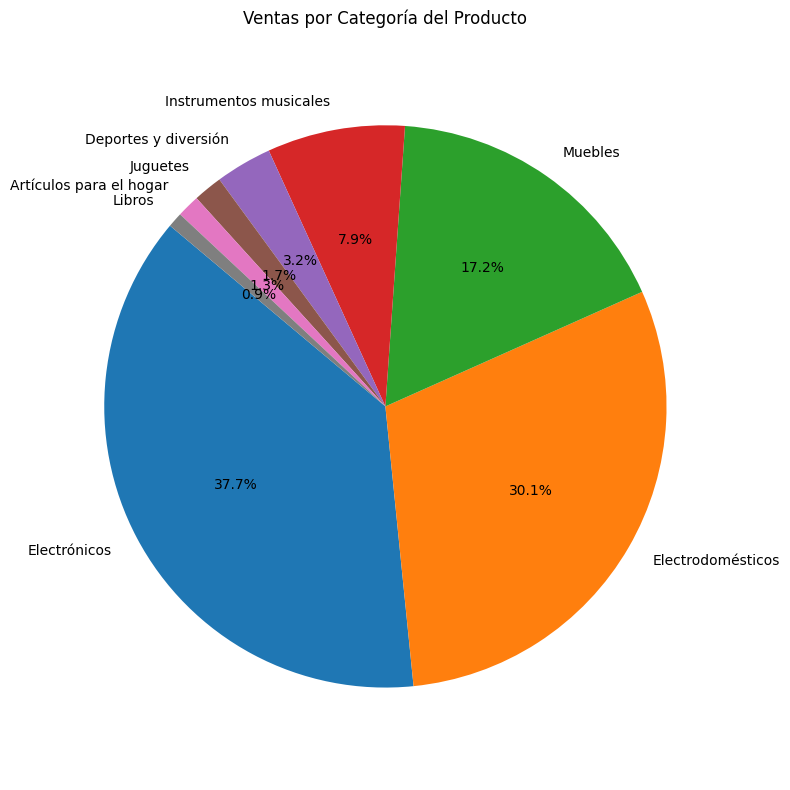

In [21]:
# Crear gr√°fico de pastel
plt.figure(figsize=(8, 8))
plt.pie(totales, labels=categorias, autopct='%1.1f%%', startangle=140)
plt.title('Ventas por Categor√≠a del Producto')
plt.axis('equal')
plt.tight_layout()
plt.show()



## Venta por tienda


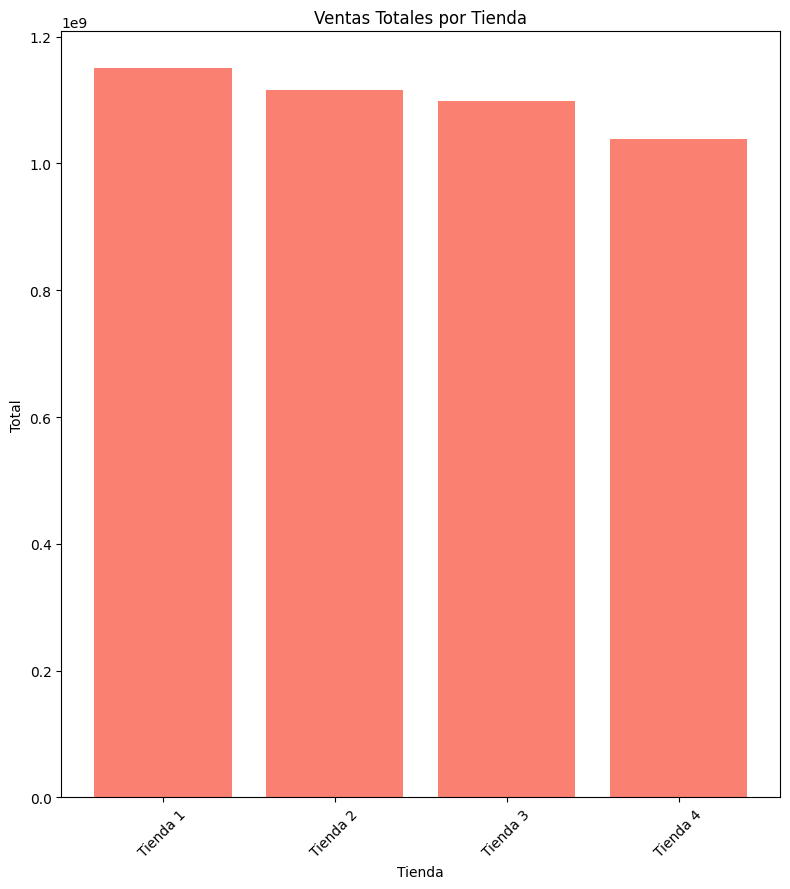

In [31]:
plt.figure(figsize=(8, 9))
plt.bar(ventas_por_tienda.keys(), ventas_por_tienda.values(), color='salmon')
plt.title('Ventas Totales por Tienda')
plt.ylabel('Total')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Envios promedio por tienda


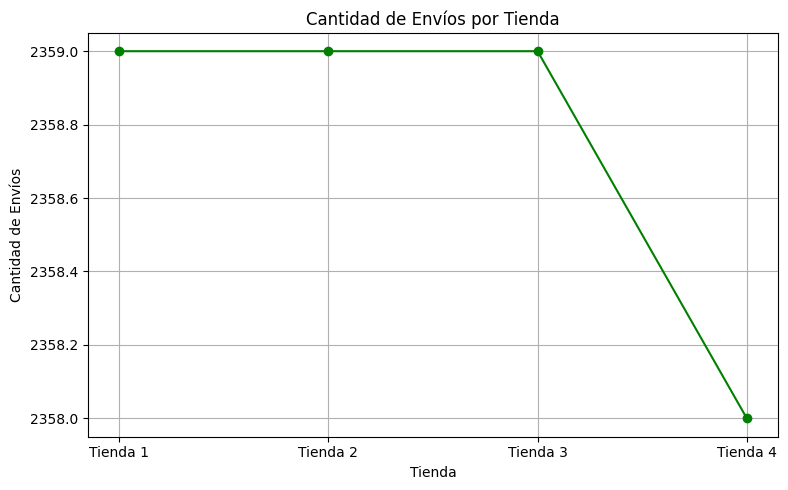

In [23]:
plt.figure(figsize=(8, 5))
tiendas = list(envios_por_tienda.keys())
valores = list(envios_por_tienda.values())

plt.plot(tiendas, valores, marker='o', linestyle='-', color='green')
plt.title('Cantidad de Env√≠os por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Env√≠os')
plt.grid(True)
plt.tight_layout()
plt.show()

##Ventas de mayor y menor categoria por tienda

In [24]:
tiendas = []
ventas_menor = []
ventas_mayor = []
categorias_menor = []
categorias_mayor = []

In [25]:
for tienda, url in urls.items():
    ventas_por_categoria = {}

    with urllib.request.urlopen(url) as response:
        lines = [line.decode('utf-8') for line in response.readlines()]
        lector = csv.DictReader(lines)

        for fila in lector:
            try:
                categoria = fila['Categor√≠a del Producto']
                precio = float(fila['Precio'])
                ventas_por_categoria[categoria] = ventas_por_categoria.get(categoria, 0) + precio
            except (ValueError, KeyError):
                continue

    if not ventas_por_categoria:
        continue

    # Categor√≠as m√°s y menos vendidas
    cat_mayor = max(ventas_por_categoria, key=ventas_por_categoria.get)
    cat_menor = min(ventas_por_categoria, key=ventas_por_categoria.get)

    # Guardar datos para el gr√°fico
    tiendas.append(tienda)
    ventas_mayor.append(ventas_por_categoria[cat_mayor])
    ventas_menor.append(ventas_por_categoria[cat_menor])
    categorias_mayor.append(cat_mayor)
    categorias_menor.append(cat_menor)

    # Mostrar en consola
    print(f"\n {tienda}")
    print(f"üîª Categor√≠a MENOS vendida: {cat_menor} - ${ventas_por_categoria[cat_menor]:,.2f}")
    print(f"üî∫ Categor√≠a M√ÅS vendida: {cat_mayor} - ${ventas_por_categoria[cat_mayor]:,.2f}")


 Tienda 1
üîª Categor√≠a MENOS vendida: Libros - $8,784,900.00
üî∫ Categor√≠a M√ÅS vendida: Electr√≥nicos - $429,493,500.00

 Tienda 2
üîª Categor√≠a MENOS vendida: Libros - $10,091,200.00
üî∫ Categor√≠a M√ÅS vendida: Electr√≥nicos - $410,831,100.00

 Tienda 3
üîª Categor√≠a MENOS vendida: Libros - $9,498,700.00
üî∫ Categor√≠a M√ÅS vendida: Electr√≥nicos - $410,775,800.00

 Tienda 4
üîª Categor√≠a MENOS vendida: Libros - $9,321,300.00
üî∫ Categor√≠a M√ÅS vendida: Electr√≥nicos - $409,476,100.00


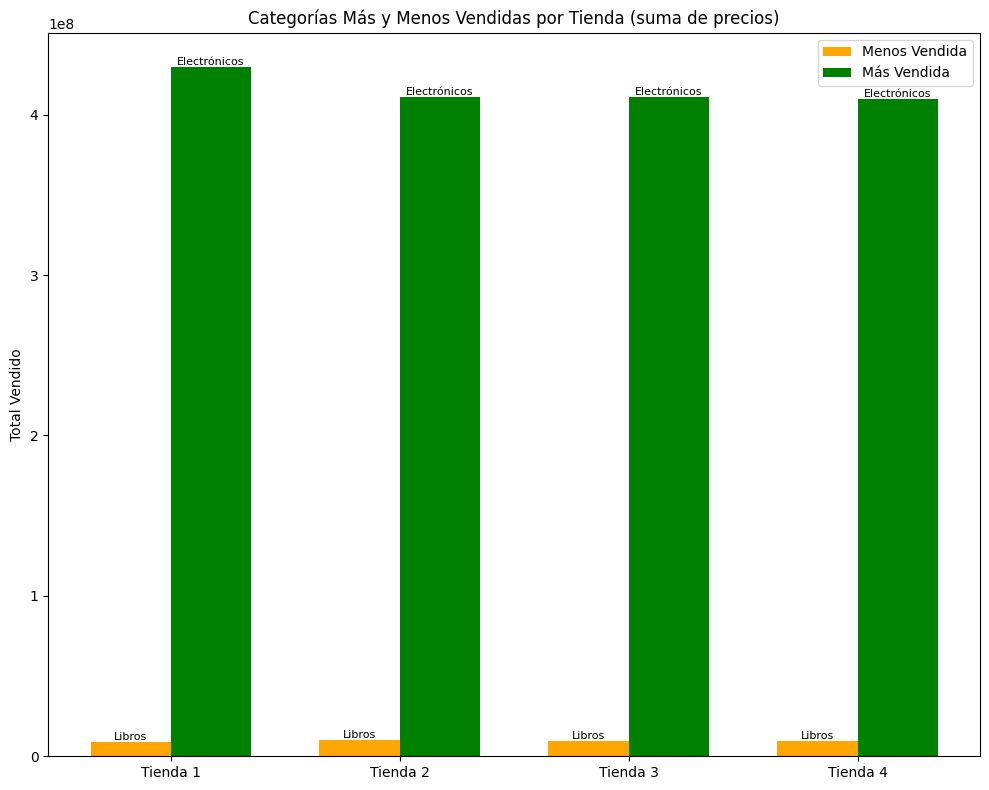

In [32]:
# Gr√°fico de barras agrupadas
x = np.arange(len(tiendas))
width = 0.35

plt.figure(figsize=(10, 8))
plt.bar(x - width/2, ventas_menor, width, label='Menos Vendida', color='orange')
plt.bar(x + width/2, ventas_mayor, width, label='M√°s Vendida', color='green')

# A√±adir etiquetas de categor√≠as
for i in range(len(tiendas)):
    plt.text(x[i] - width/2, ventas_menor[i], categorias_menor[i], ha='center', va='bottom', fontsize=8, rotation=0)
    plt.text(x[i] + width/2, ventas_mayor[i], categorias_mayor[i], ha='center', va='bottom', fontsize=8, rotation=0)

plt.xticks(x, tiendas)
plt.ylabel('Total Vendido')
plt.title('Categor√≠as M√°s y Menos Vendidas por Tienda (suma de precios)')
plt.legend()
plt.tight_layout()
plt.show()

# 7. Informe final

**Informe Final**

**Introducci√≥n.**

El presente informe tiene como objetivo realizar un an√°lisis integral del desempe√±o comercial de cuatro tiendas que cuentan con un amplio inventario y una diversidad de categor√≠as de productos. A partir de los datos suministrados, se evaluaron variables clave como volumen de ventas, rendimiento por categor√≠a, frecuencia de env√≠os y calificaciones de los clientes.
El prop√≥sito principal de este an√°lisis es identificar la tienda con el menor nivel de ingresos y establecer, con base en criterios objetivos, una recomendaci√≥n fundamentada sobre cu√°l de las tiendas presenta menor viabilidad operativa y podr√≠a ser considerada para su posible venta o desinversi√≥n estrat√©gica.

Tras realizar un an√°lisis detallado utilizando la informaci√≥n proporcionada, se han identificado los principales factores relacionados con el desempe√±o de cada tienda. A continuaci√≥n, se resumen los hallazgos m√°s relevantes:


**‚Ä¢	Ventas Totales:**

La tienda con el mayor volumen de ventas fue la Tienda 1, mientras que la de menor facturaci√≥n fue la Tienda 2. La diferencia de ingresos entre ambas asciende a $112,504,700.00.

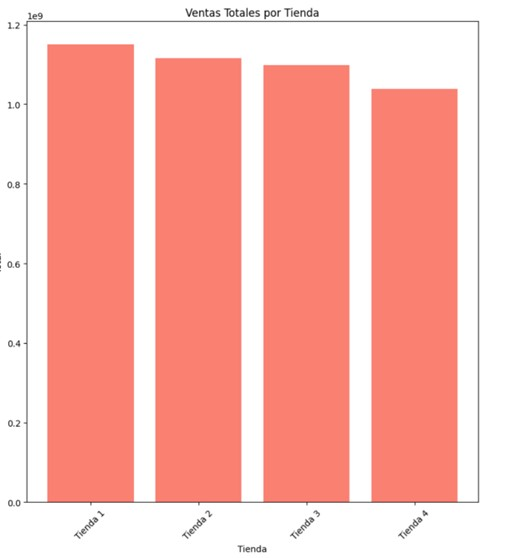



**‚Ä¢	Categor√≠a m√°s vendida:**
En todas las tiendas, la categor√≠a con mayor demanda fue Electr√≥nica. La Tienda 1 destac√≥ como la que m√°s vendi√≥ dentro de esta categor√≠a, mientras que la Tienda 4 fue la que report√≥ la menor venta de productos electr√≥nicos.

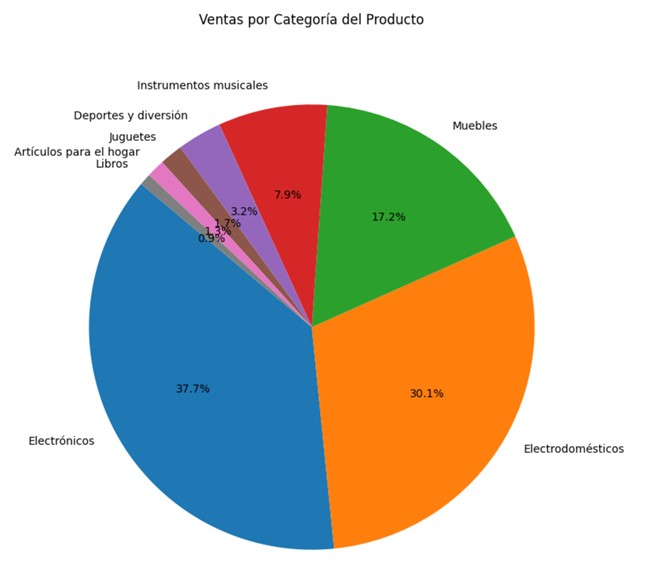


**‚Ä¢	Categor√≠a menos vendida:**
La categor√≠a con menor volumen de ventas fue Libros. En este caso, la Tienda 1 fue la que registr√≥ la menor venta en esta categor√≠a, y la Tienda 2 la que report√≥ la mayor.

 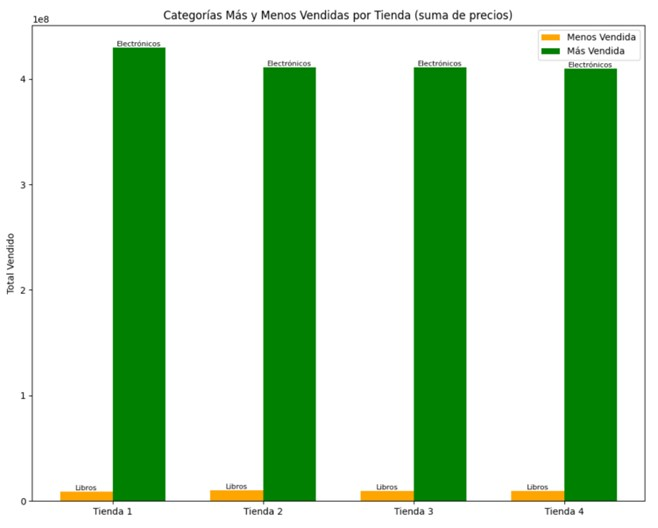


**‚Ä¢	Volumen de env√≠os por tienda:**
Las Tiendas 1, 2 y 3 realizaron la misma cantidad de env√≠os. La Tienda 4 tuvo una ligera diferencia, con un env√≠o menos en comparaci√≥n con las dem√°s.

**‚Ä¢	Calificaci√≥n promedio por tienda:**
El an√°lisis de las calificaciones otorgadas por los clientes muestra que la Tienda 3 obtuvo la mayor puntuaci√≥n promedio, mientras que la Tienda 1 fue la que recibi√≥ la m√°s baja. La diferencia entre ambas fue de 0.07 puntos.

**Conclusi√≥n:**

De acuerdo con los resultados obtenidos, se recomienda considerar la venta o cierre de la Tienda 4. Esta tienda no solo present√≥ el menor n√∫mero de env√≠os y un bajo desempe√±o en la categor√≠a m√°s relevante (Electr√≥nica), sino que adem√°s no se destac√≥ positivamente en ning√∫n aspecto relevante del an√°lisis. Su rendimiento general sugiere una baja rentabilidad y poco potencial de crecimiento en comparaci√≥n con las dem√°s tiendas evaluadas.


